# EDA del dataset 'Accesos por Rangos'

## Librerías

### Librerías nativas

In [19]:
import os

### Librerías instaladas

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Extracción del dataset

Ruta actual.

In [21]:
ruta_actual = os.getcwd()

ruta_actual

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\notebooks'

Ruta raíz del proyecto.

In [22]:
ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_proyecto

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones'

Ruta del dataset a extraer.

In [23]:
ruta_del_dataset = os.path.join(
    ruta_del_proyecto, 
    'data', 
    'accesos_por_rangos.parquet'
    )

ruta_del_dataset

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\data\\accesos_por_rangos.parquet'

Se extrae el dataset.

In [24]:
accesos_por_rangos = pd.read_parquet(
    ruta_del_dataset, 
    engine='fastparquet'
    )

## Exploración del dataset

In [25]:
accesos_por_rangos

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2014,1,La Rioja,10.0,5111.0,9390.0,1165.0,35.0,0.0,0.0,0.0,15711.0
996,2014,1,Mendoza,35.0,6.0,166655.0,19.0,10.0,6.0,9.0,0.0,166740.0
997,2014,1,Misiones,545.0,14460.0,52852.0,5139.0,958.0,0.0,0.0,0.0,73954.0
998,2014,1,Neuquén,4133.0,987.0,77148.0,84.0,1582.0,2.0,22.0,0.0,83958.0


In [26]:
accesos_por_rangos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


No hay duplicados.

In [27]:
accesos_por_rangos.duplicated(
    subset=['Año', 'Trimestre', 'Provincia']
    ).sum()

np.int64(0)

Unas pocas provincias tienen nulos en la columna 'Otros'. Esta columna será ignorada.

In [28]:
accesos_por_rangos[accesos_por_rangos['OTROS'].isna()]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
481,2019,2,Capital Federal,74.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
491,2019,2,La Rioja,9.0,11.0,39819.0,4297.0,4857.0,13.0,1298.0,NaN,50304.0
492,2019,2,Mendoza,20.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
499,2019,2,Santa Cruz,25.0,84.0,24861.0,3806.0,1202.0,28.0,4.0,NaN,30010.0
502,2019,2,Tierra Del Fuego,6.0,123.0,41824.0,4241.0,1573.0,96.0,32.0,NaN,47895.0
503,2019,2,Tucumán,16.0,157.0,78891.0,44296.0,24291.0,628.0,18394.0,NaN,166673.0


## Comparación de rangos de velocidad de Internet a lo largo de los años

Se crea un nuevo dataframe con formato largo para poder graficar.

In [29]:
accesos_por_rangos_largo = pd.melt(
    accesos_por_rangos, 
    id_vars='Año', 
    value_vars=accesos_por_rangos.iloc[:, 3:10].columns, 
    var_name='Rangos de velocidad', 
    value_name='Accesos'
    )

Se crea un grafico de linea para mostrar las velocidades consumidas entre el 2014 y el 2024.

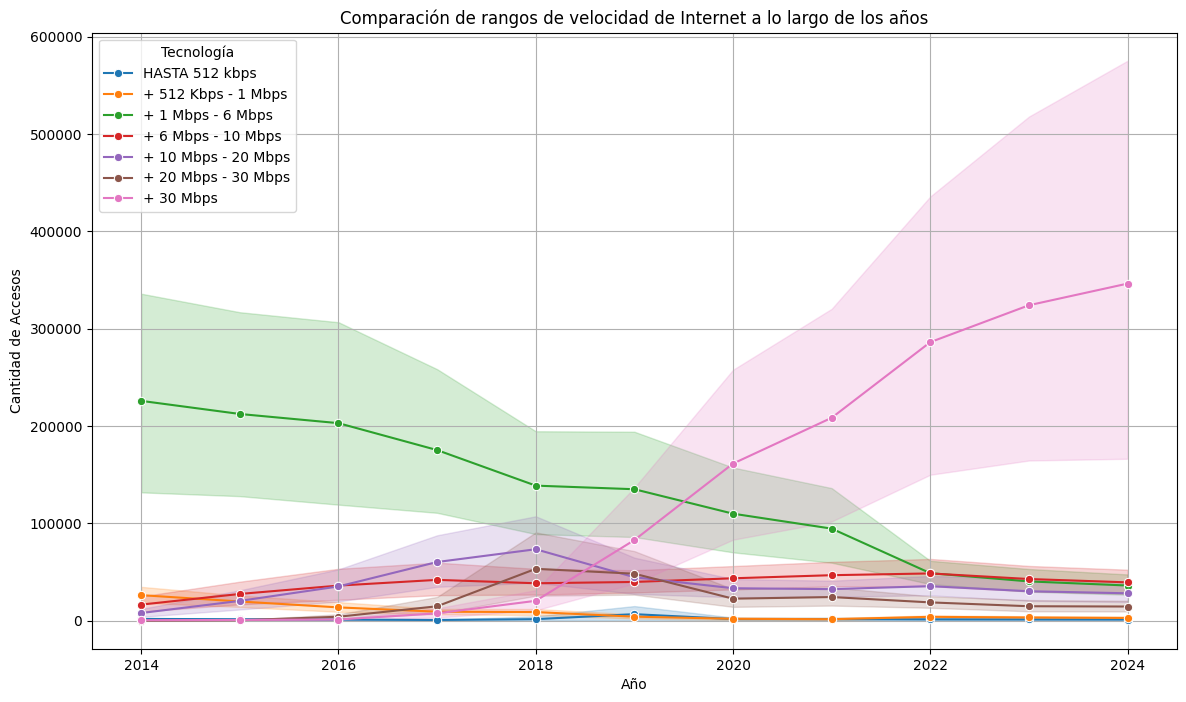

In [30]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=accesos_por_rangos_largo, 
    x='Año', 
    y='Accesos', 
    hue='Rangos de velocidad', 
    marker='o'
    )
plt.title('Comparación de rangos de velocidad de Internet a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()

### Análisis del gráfico:

El grafico muestra que hasta el año 2019 el rango mas consumido era el de + 1 Mbps - 6 Mbps. Mientras que a partir de 2020 fue superado por el rango de mas de 30 Mbps. 

A su vez el grafico indica que los rangos usados estan obsoletos. Esto es asi porque para 2022 la gran mayoria de los accesos tenian el rango + 30 Mbps.

Se recomienda actualizar los rangos para identificar el rango mas popular actualmente. En el año actual, 2024, muchas casa tienen conexión a internet de 50 o 100 Mbps. Incluso hay mayores.

## Comparación de rangos de velocidad sin los rangos + 1 Mbps - 6 Mbps ni + 30 Mbps

Se hace este nuevo grafico para ver mas en detalle el cambio de los otros rangos, a lo largo del tiempo.

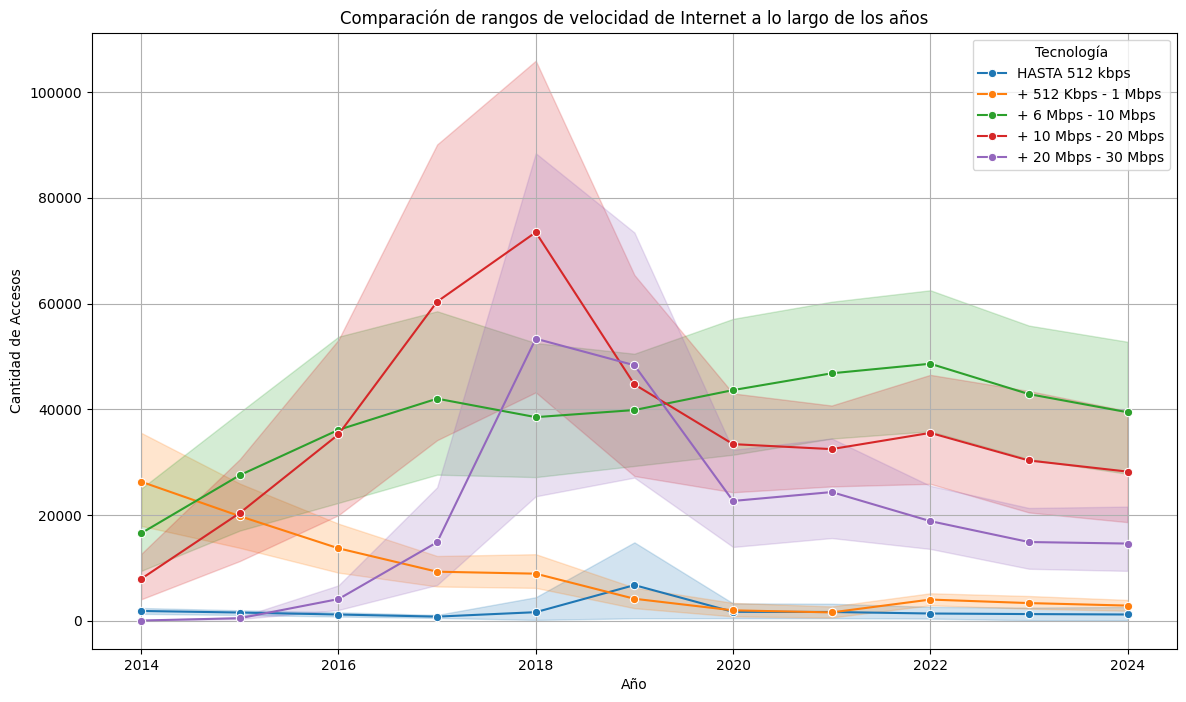

In [31]:
accesos_por_rangos_largo = pd.melt(
    accesos_por_rangos, 
    id_vars='Año', 
    value_vars=accesos_por_rangos.iloc[:, [3,4,6,7,8]].columns, 
    var_name='Rangos de velocidad', 
    value_name='Accesos'
    )

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=accesos_por_rangos_largo, 
    x='Año', 
    y='Accesos', 
    hue='Rangos de velocidad', 
    marker='o'
    )
plt.title('Comparación de rangos de velocidad de Internet a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')
plt.legend(title='Tecnología')
plt.grid(True)
plt.show()

### Análisis del gráfico



In [32]:
accesos_por_rangos[(accesos_por_rangos['Año'] == 2024) & (accesos_por_rangos['Trimestre'] == 1)]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
24,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
25,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
26,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
27,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
28,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0
29,2024,1,Córdoba,99.0,8056.0,110371.0,87798.0,47085.0,29939.0,784141.0,14710.0,1082199.0
30,2024,1,Corrientes,67.0,2690.0,18637.0,16530.0,7680.0,1996.0,104052.0,6242.0,157894.0
31,2024,1,Entre Ríos,107.0,4290.0,34574.0,51447.0,16122.0,7228.0,168809.0,13975.0,296552.0
32,2024,1,Formosa,85.0,158.0,22133.0,10924.0,4176.0,273.0,24667.0,302.0,62718.0
33,2024,1,Jujuy,58.0,1268.0,14964.0,11283.0,28548.0,276.0,59686.0,1970.0,118053.0


In [33]:
año_2024_trimestre_1 = accesos_por_rangos[(accesos_por_rangos['Año'] == 2024) & (accesos_por_rangos['Trimestre'] == 4)].copy()

In [34]:
año_2024_trimestre_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 48 to 71
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  24 non-null     int64  
 1   Trimestre            24 non-null     int64  
 2   Provincia            24 non-null     object 
 3   HASTA 512 kbps       24 non-null     float64
 4   + 512 Kbps - 1 Mbps  24 non-null     float64
 5   + 1 Mbps - 6 Mbps    24 non-null     float64
 6   + 6 Mbps - 10 Mbps   24 non-null     float64
 7   + 10 Mbps - 20 Mbps  24 non-null     float64
 8   + 20 Mbps - 30 Mbps  24 non-null     float64
 9   + 30 Mbps            24 non-null     float64
 10  OTROS                24 non-null     float64
 11  Total                24 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 2.4+ KB


In [35]:
año_2024_trimestre_1['Total'] = año_2024_trimestre_1['Total'].astype('int64')

In [36]:
año_2024_trimestre_1['Porcentaje'] = año_2024_trimestre_1['Total'] / año_2024_trimestre_1['Total'].sum()

In [37]:
año_2024_trimestre_1['Porcentaje']

48    0.433994
49    0.127677
50    0.006459
51    0.012763
52    0.014736
53    0.093465
54    0.013810
55    0.025861
56    0.005369
57    0.010220
58    0.010507
59    0.007596
60    0.025923
61    0.017348
62    0.014256
63    0.014585
64    0.017729
65    0.008938
66    0.013395
67    0.007537
68    0.078761
69    0.010671
70    0.005334
71    0.023064
Name: Porcentaje, dtype: float64

In [38]:
año_2024_trimestre_1 = año_2024_trimestre_1.sort_values(by='Porcentaje', ascending=False)

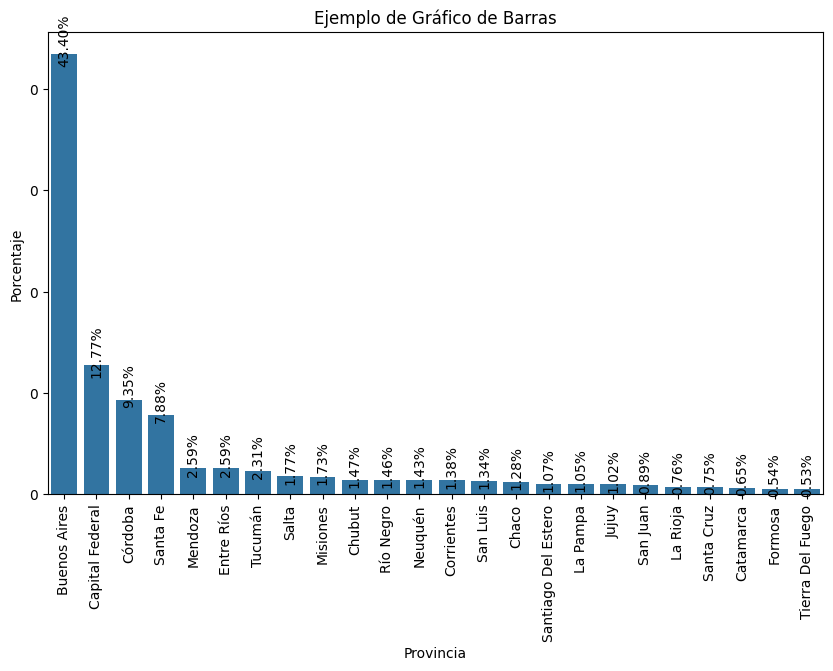

In [39]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Provincia', y='Porcentaje', data=año_2024_trimestre_1)
plt.title('Ejemplo de Gráfico de Barras')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches: 
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=90)
plt.show()

In [40]:
buenos_aires = pd.DataFrame({
    'Provincia': ['Buenos Aires'], 
    'Total': [año_2024_trimestre_1.iloc[0]['Total']]
    })

buenos_aires

,Provincia,Total
0,Buenos Aires,5011620


In [41]:
tres_mayores = pd.DataFrame({
    'Provincia': ['Capital Federal, Cordoba y Santa Fe'], 
    'Total': [año_2024_trimestre_1.iloc[1:4]['Total'].sum()]
    })

tres_mayores

,Provincia,Total
0,"Capital Federal, Cordoba y Santa Fe",3463170


In [42]:
otros = pd.DataFrame({
    'Provincia': ['Otros'],
    'Total': [año_2024_trimestre_1.iloc[4:]['Total'].sum()]
})

otros

,Provincia,Total
0,Otros,3072871


In [43]:
df_final = pd.concat([buenos_aires, tres_mayores, otros])

In [44]:
df_final.sort_values(by='Total', ascending=True, inplace=True)

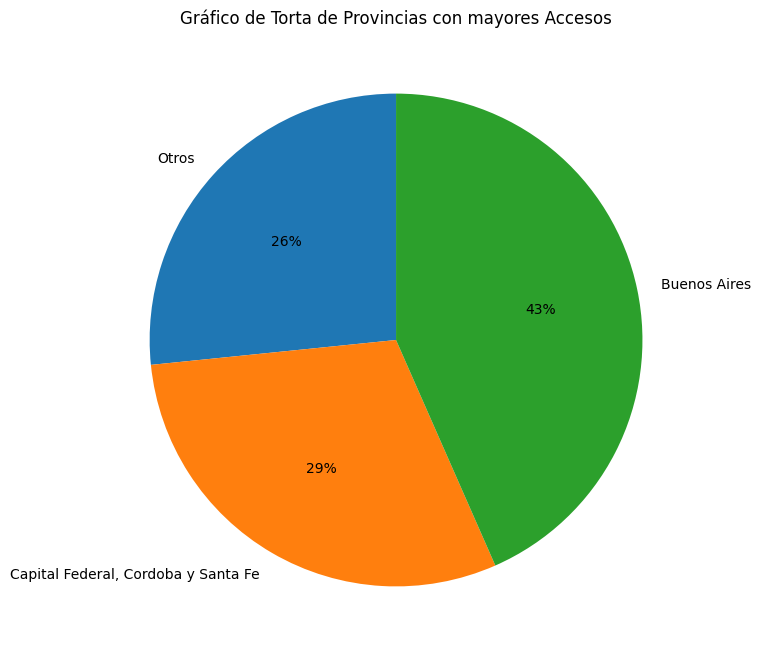

In [45]:
plt.figure(figsize=(8, 8))
plt.pie(
    df_final['Total'], 
    labels=df_final['Provincia'], 
    autopct='%d%%', 
    startangle=90
    )
plt.title('Gráfico de Torta de Provincias con mayores Accesos')
plt.show()